## UK ACCIDENT SIMPLE EDA

In [63]:
# import packages
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sb 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',100)
pd.options.display.float_format='{:,.2f}'.format

In [64]:
accidents_data=pd.read_csv('../input/uk-accidents-10-years-history-with-many-variables/Accidents0514.csv'\
                      ,low_memory=False)

In [65]:
casuality_data=pd.read_csv('../input/uk-accidents-10-years-history-with-many-variables/Casualties0514.csv')

In [66]:
vehicles_data=pd.read_csv('../input/uk-accidents-10-years-history-with-many-variables/Vehicles0514.csv')

In [67]:
display(accidents_data.head())
print('-'*80)
display(casuality_data.head())
print('-'*80)
display(vehicles_data.head())

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,"525,680.00","178,240.00",-0.19,51.49,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,"524,170.00","181,650.00",-0.21,51.52,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,"524,520.00","182,240.00",-0.21,51.53,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,"526,900.00","177,530.00",-0.17,51.48,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,"528,060.00","179,040.00",-0.16,51.50,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


--------------------------------------------------------------------------------


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


--------------------------------------------------------------------------------


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1


In [68]:
display(accidents_data.info())
print('-'*80)
display(casuality_data.info())
print('-'*80)
display(vehicles_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1640597 non-null  object 
 1   Location_Easting_OSGR                        1640486 non-null  float64
 2   Location_Northing_OSGR                       1640486 non-null  float64
 3   Longitude                                    1640486 non-null  float64
 4   Latitude                                     1640486 non-null  float64
 5   Police_Force                                 1640597 non-null  int64  
 6   Accident_Severity                            1640597 non-null  int64  
 7   Number_of_Vehicles                           1640597 non-null  int64  
 8   Number_of_Casualties                         1640597 non-null  int64  
 9   Date                                         1

None

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      int64 
 4   Sex_of_Casualty                     int64 
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type          

None

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Accident_Index                    object
 1   Vehicle_Reference                 int64 
 2   Vehicle_Type                      int64 
 3   Towing_and_Articulation           int64 
 4   Vehicle_Manoeuvre                 int64 
 5   Vehicle_Location-Restricted_Lane  int64 
 6   Junction_Location                 int64 
 7   Skidding_and_Overturning          int64 
 8   Hit_Object_in_Carriageway         int64 
 9   Vehicle_Leaving_Carriageway       int64 
 10  Hit_Object_off_Carriageway        int64 
 11  1st_Point_of_Impact               int64 
 12  Was_Vehicle_Left_Hand_Drive?      int64 
 13  Journey_Purpose_of_Driver         int64 
 14  Sex_of_Driver                     int64 
 15  Age_of_Driver      

None

### What is the structure of your dataset?

There are 3 CSVs in this set. Accidents are the primary ones and have references by Accident Index to the casualties and vehicles tables with 1640597 unique accident's index.

Accident file: main data set contains information about accident severity, weather, location, date, hour, day of week, road type, etc…

Vehicle file: contains information about vehicle type, vehicle model, engine size, driver sex, driver age, car age…

Casualty file: contains information about casualty severity, age, sex social class, casualty type(pedestrian or car passenger)…

Lookup file: contains the text description of all variable code in the three files. 
### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features affect more on the accident severity.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that road type, vehicle type, time, age of driver, age of vehicle, Driver IMd deprivation, will have the strongest effect on each accident severity.

<a id='clean'></a>
# Data Wrangling:
* Map column code with their text strings from a lookup table.
* drop irrelevent columns
* Merge different files
<li><a href="#imp">Imputing missing values with machine learning</a></li> 

### 1- Accident Data 

In [69]:
accidents_data.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,"525,680.00","178,240.00",-0.19,51.49,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,"524,170.00","181,650.00",-0.21,51.52,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909


In [70]:
accidents_data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

There are some columns that should be mapped with their text strings from a lookup table to be more informative.
So we will extract these values from a variable look-up file "excel file", and each sheet in this file represents the feature values for each dataset. 

In [71]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [72]:
import xlrd

In [74]:
path=r'../input/uk-accidents-10-years-history-with-many-variables/Road-Accident-Safety-Data-Guide.xls'
book=xlrd.open_workbook(path)

In [75]:
sheets=[]
for sheet in book.sheets():
    sheets.append(sheet.name)

In [76]:
sheets[:10]

['Introduction',
 'Export Variables',
 'Police Force',
 'Accident Severity',
 'Day of Week',
 'Local Authority (District)',
 'Local Authority (Highway)',
 '1st Road Class',
 'Road Type',
 'Junction Detail']

In [77]:
# select accident sheets
accident_sheets=sheets[2:22]
accident_sheets

['Police Force',
 'Accident Severity',
 'Day of Week',
 'Local Authority (District)',
 'Local Authority (Highway)',
 '1st Road Class',
 'Road Type',
 'Junction Detail',
 'Junction Control',
 '2nd Road Class',
 'Ped Cross - Human',
 'Ped Cross - Physical',
 'Light Conditions',
 'Weather',
 'Road Surface',
 'Special Conditions at Site',
 'Carriageway Hazards',
 'Urban Rural',
 'Police Officer Attend',
 'Vehicle Type']

In [78]:
# accidents_data sheets
accident_lookup_table=pd.read_excel(path,sheet_name=accident_sheets,index_col=None)
type(accident_lookup_table)

dict

In [79]:
accident_lookup_table.keys()

dict_keys(['Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend', 'Vehicle Type'])

In [80]:
accident_lookup_table.items()

dict_items([('Police Force',     code                  label
0      1    Metropolitan Police
1      3                Cumbria
2      4             Lancashire
3      5             Merseyside
4      6     Greater Manchester
5      7               Cheshire
6     10            Northumbria
7     11                 Durham
8     12        North Yorkshire
9     13         West Yorkshire
10    14        South Yorkshire
11    16             Humberside
12    17              Cleveland
13    20          West Midlands
14    21          Staffordshire
15    22            West Mercia
16    23           Warwickshire
17    30             Derbyshire
18    31        Nottinghamshire
19    32           Lincolnshire
20    33         Leicestershire
21    34       Northamptonshire
22    35         Cambridgeshire
23    36                Norfolk
24    37                Suffolk
25    40           Bedfordshire
26    41          Hertfordshire
27    42                  Essex
28    43          Thames Valley
29    44   

In [81]:
def nasted_dict_to_map_var_string_label(lookup_table):
    nasted_dict={}
    for i, (key, element) in enumerate(lookup_table.items()):
        nasted_dict[key]=dict(element.values)

    return nasted_dict

In [82]:
accident_nasted_dict=nasted_dict_to_map_var_string_label(accident_lookup_table)
accident_nasted_dict['Accident Severity']

{1: 'Fatal', 2: 'Serious', 3: 'Slight'}

In [83]:
accidents_data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [84]:
accident_nasted_dict.keys()

dict_keys(['Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend', 'Vehicle Type'])

In [85]:
# change cols names to match variables names on sheets
accidents_data.rename(columns=lambda x: re.sub('_',' ',x),inplace=True)
accidents_data.rename(columns={'Pedestrian Crossing Human Control':'Ped Cross - Human', 
                       'Pedestrian Crossing Human Control':'Ped Cross - Physical','Weather Conditions':'Weather',
                       'Urban or Rural Area':'Urban Rural','Road Surface Conditions':'Road Surface',
                       'Did Police Officer Attend Scene of Accident':'Police Officer Attend'
    
},inplace=True)

In [86]:
accidents_data.columns

Index(['Accident Index', 'Location Easting OSGR', 'Location Northing OSGR',
       'Longitude', 'Latitude', 'Police Force', 'Accident Severity',
       'Number of Vehicles', 'Number of Casualties', 'Date', 'Day of Week',
       'Time', 'Local Authority (District)', 'Local Authority (Highway)',
       '1st Road Class', '1st Road Number', 'Road Type', 'Speed limit',
       'Junction Detail', 'Junction Control', '2nd Road Class',
       '2nd Road Number', 'Pedestrian Crossing-Human Control',
       'Pedestrian Crossing-Physical Facilities', 'Light Conditions',
       'Weather', 'Road Surface', 'Special Conditions at Site',
       'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend',
       'LSOA of Accident Location'],
      dtype='object')

In [87]:
def map_values(data,nasted_dict):
    
    new_values=data.replace(nasted_dict,inplace=True)
    return new_values

In [88]:
map_values(accidents_data,accident_nasted_dict)

In [89]:
accidents_data.head(3)

,Accident Index,Location Easting OSGR,Location Northing OSGR,Longitude,Latitude,Police Force,Accident Severity,Number of Vehicles,Number of Casualties,Date,Day of Week,Time,Local Authority (District),Local Authority (Highway),1st Road Class,1st Road Number,Road Type,Speed limit,Junction Detail,Junction Control,2nd Road Class,2nd Road Number,Pedestrian Crossing-Human Control,Pedestrian Crossing-Physical Facilities,Light Conditions,Weather,Road Surface,Special Conditions at Site,Carriageway Hazards,Urban Rural,Police Officer Attend,LSOA of Accident Location
0,200501BS00001,"525,680.00","178,240.00",-0.19,51.49,Metropolitan Police,Serious,1,1,04/01/2005,Tuesday,17:42,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,-1,0,0,1,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,E01002849
1,200501BS00002,"524,170.00","181,650.00",-0.21,51.52,Metropolitan Police,Slight,1,1,05/01/2005,Wednesday,17:36,Kensington and Chelsea,Kensington and Chelsea,B,450,Dual carriageway,30,Crossroads,Auto traffic signal,C,0,0,5,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01002909
2,200501BS00003,"524,520.00","182,240.00",-0.21,51.53,Metropolitan Police,Slight,2,1,06/01/2005,Thursday,00:15,Kensington and Chelsea,Kensington and Chelsea,C,0,Single carriageway,30,Not at junction or within 20 metres,Data missing or out of range,-1,0,0,0,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01002857


In [90]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Accident Index                           1640597 non-null  object 
 1   Location Easting OSGR                    1640486 non-null  float64
 2   Location Northing OSGR                   1640486 non-null  float64
 3   Longitude                                1640486 non-null  float64
 4   Latitude                                 1640486 non-null  float64
 5   Police Force                             1640597 non-null  object 
 6   Accident Severity                        1640597 non-null  object 
 7   Number of Vehicles                       1640597 non-null  int64  
 8   Number of Casualties                     1640597 non-null  int64  
 9   Date                                     1640597 non-null  object 
 10  Day of Week       

In [91]:
def reduce_memory_usage(data):
    for col in data.columns:
        
        if data[col].dtype == 'int64':
            data[col]=data[col].astype('int8')
        elif data[col].dtype == 'float64':
            data[col]=data[col].astype('float16')
        elif data[col].dtype == 'object':   
            data[col]=data[col].astype('category') 
    return data.info()  

In [92]:
reduce_memory_usage(accidents_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
 #   Column                                   Non-Null Count    Dtype   
---  ------                                   --------------    -----   
 0   Accident Index                           1640597 non-null  category
 1   Location Easting OSGR                    1640486 non-null  float16 
 2   Location Northing OSGR                   1640486 non-null  float16 
 3   Longitude                                1640486 non-null  float16 
 4   Latitude                                 1640486 non-null  float16 
 5   Police Force                             1640597 non-null  category
 6   Accident Severity                        1640597 non-null  category
 7   Number of Vehicles                       1640597 non-null  int8    
 8   Number of Casualties                     1640597 non-null  int8    
 9   Date                                     1640597 non-null  category
 10  Day of

In [93]:
def normalize_cols_names(cols):
    new_names=[re.sub('\W+','_',x.lower()) for x in cols]
    for index in range(len(new_names)):
        if new_names[index].endswith('_'):
            new_names[index]=new_names[index][:-1]
            
    return new_names

In [94]:
accidents_data.columns = normalize_cols_names(accidents_data.columns)
accidents_data.columns

Index(['accident_index', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_highway',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather', 'road_surface', 'special_conditions_at_site',
       'carriageway_hazards', 'urban_rural', 'police_officer_attend',
       'lsoa_of_accident_location'],
      dtype='object')

# Drop irrelevent columns

In [95]:
# In this analysis we are not interseted about location features that much so we find this features irrelevent, however
# maybe we will use urban and rulral feature and local_authority_district for  location info. 
accidents_data.drop(['location_easting_osgr','location_northing_osgr','longitude','police_force','local_authority_highway'
             ,'1st_road_number','2nd_road_class','2nd_road_number','latitude',\
              'lsoa_of_accident_location'],inplace=True,axis=1
            )

### Missing values

In [96]:
accidents_data.isna().sum()

accident_index                               0
accident_severity                            0
number_of_vehicles                           0
number_of_casualties                         0
date                                         0
day_of_week                                  0
time                                       133
local_authority_district                     0
1st_road_class                               0
road_type                                    0
speed_limit                                  0
junction_detail                              0
junction_control                             0
pedestrian_crossing_human_control            0
pedestrian_crossing_physical_facilities      0
light_conditions                             0
weather                                      0
road_surface                                 0
special_conditions_at_site                   0
carriageway_hazards                          0
urban_rural                                  0
police_office

In [97]:
# there are values such as ['None','Unclassified','Unknown','Data missing or out of range',-1,0] should be replaced with np.nan
# to know which col has the highest NaN
accidents_data.sample(4)

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather,road_surface,special_conditions_at_site,carriageway_hazards,urban_rural,police_officer_attend
1062584,201101FH10359,Serious,2,1,02/08/2011,Tuesday,07:40,Hammersmith and Fulham,A,Single carriageway,30,Crossroads,Give way or uncontrolled,0,1,Daylight,Fine no high winds,Dry,None,None,Urban,Yes
515212,2007440282507,Slight,2,1,18/06/2007,Monday,18:05,Eastleigh,Unclassified,Single carriageway,30,T or staggered junction,Give way or uncontrolled,0,4,Daylight,Fine no high winds,Dry,None,None,Urban,Yes
251403,2006100981806,Serious,2,1,15/11/2006,Wednesday,17:00,Sunderland,C,Single carriageway,30,T or staggered junction,Give way or uncontrolled,0,1,Daylight,Fine no high winds,Wet or damp,None,None,Urban,Yes
1237108,201204CJ12267,Slight,2,1,17/12/2012,Monday,18:30,West Lancashire,A,Dual carriageway,70,Not at junction or within 20 metres,Data missing or out of range,0,0,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Rural,Yes


In [98]:
def replace_missing_values(data):
    missing_list=['None',
        'Data missing or out of range',
                  -1,0
                  
    ]
    for col in data.columns:
        for n in missing_list:

            if n in data[col].values:
                data.loc[data[col]==n,col]=np.nan
           
    return data.info()        

In [99]:
import time

In [100]:
t=time.time()
replace_missing_values(accidents_data)
time.time() - t

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 22 columns):
 #   Column                                   Non-Null Count    Dtype   
---  ------                                   --------------    -----   
 0   accident_index                           1640597 non-null  category
 1   accident_severity                        1640597 non-null  category
 2   number_of_vehicles                       1640597 non-null  int8    
 3   number_of_casualties                     1640597 non-null  int8    
 4   date                                     1640597 non-null  category
 5   day_of_week                              1640597 non-null  category
 6   time                                     1640464 non-null  category
 7   local_authority_district                 1640597 non-null  category
 8   1st_road_class                           1640597 non-null  category
 9   road_type                                1640597 non-null  category
 10  speed_

0.33456897735595703

In [101]:
accidents_data.isna().sum()

accident_index                                   0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                           133
local_authority_district                         0
1st_road_class                                   0
road_type                                        0
speed_limit                                      0
junction_detail                                 18
junction_control                            585322
pedestrian_crossing_human_control          1630844
pedestrian_crossing_physical_facilities    1369458
light_conditions                                 0
weather                                        161
road_surface                                  2155
special_conditions_at_site                 1600023
carriageway_hazards            

In [102]:
# precentage of missing values
accidents_data.isna().mean()*100

accident_index                             0.00
accident_severity                          0.00
number_of_vehicles                         0.00
number_of_casualties                       0.00
date                                       0.00
day_of_week                                0.00
time                                       0.01
local_authority_district                   0.00
1st_road_class                             0.00
road_type                                  0.00
speed_limit                                0.00
junction_detail                            0.00
junction_control                          35.68
pedestrian_crossing_human_control         99.41
pedestrian_crossing_physical_facilities   83.47
light_conditions                           0.00
weather                                    0.01
road_surface                               0.13
special_conditions_at_site                97.53
carriageway_hazards                       98.18
urban_rural                             

In [103]:
accidents_data.dropna(axis=0, how='all').shape

(1640597, 22)

In [104]:
# drop columns that have more than 80 % 
accidents_data.drop(['pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities',
                     'special_conditions_at_site','carriageway_hazards'
],inplace=True,axis=1)

In [105]:
# this has 35% missing values, and for me it isn't useful feature. 
accidents_data.drop('junction_control',inplace=True,axis=1)

In [106]:
accidents_data.isna().sum()

accident_index                 0
accident_severity              0
number_of_vehicles             0
number_of_casualties           0
date                           0
day_of_week                    0
time                         133
local_authority_district       0
1st_road_class                 0
road_type                      0
speed_limit                    0
junction_detail               18
light_conditions               0
weather                      161
road_surface                2155
urban_rural                    0
police_officer_attend        270
dtype: int64

In [107]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   accident_index            1640597 non-null  category
 1   accident_severity         1640597 non-null  category
 2   number_of_vehicles        1640597 non-null  int8    
 3   number_of_casualties      1640597 non-null  int8    
 4   date                      1640597 non-null  category
 5   day_of_week               1640597 non-null  category
 6   time                      1640464 non-null  category
 7   local_authority_district  1640597 non-null  category
 8   1st_road_class            1640597 non-null  category
 9   road_type                 1640597 non-null  category
 10  speed_limit               1640597 non-null  int8    
 11  junction_detail           1640579 non-null  category
 12  light_conditions          1640597 non-null  category
 13  weather     

# Extract Month, Year and Hour from date's columns

In [108]:
accidents_data.time.values

['17:42', '17:36', '00:15', '10:35', '21:13', ..., '22:20', '06:40', '02:00', '06:55', '15:00']
Length: 1640597
Categories (1439, object): ['00:01', '00:02', '00:03', '00:04', ..., '23:56', '23:57', '23:58', '23:59']

In [109]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   accident_index            1640597 non-null  category
 1   accident_severity         1640597 non-null  category
 2   number_of_vehicles        1640597 non-null  int8    
 3   number_of_casualties      1640597 non-null  int8    
 4   date                      1640597 non-null  category
 5   day_of_week               1640597 non-null  category
 6   time                      1640464 non-null  category
 7   local_authority_district  1640597 non-null  category
 8   1st_road_class            1640597 non-null  category
 9   road_type                 1640597 non-null  category
 10  speed_limit               1640597 non-null  int8    
 11  junction_detail           1640579 non-null  category
 12  light_conditions          1640597 non-null  category
 13  weather     

In [110]:
accidents_data.isna().sum()

accident_index                 0
accident_severity              0
number_of_vehicles             0
number_of_casualties           0
date                           0
day_of_week                    0
time                         133
local_authority_district       0
1st_road_class                 0
road_type                      0
speed_limit                    0
junction_detail               18
light_conditions               0
weather                      161
road_surface                2155
urban_rural                    0
police_officer_attend        270
dtype: int64

In [111]:
accidents_data['hour']=accidents_data['time'].apply(lambda x: re.split(':',x)[0]) #.astype('int8')
accidents_data.hour.values

array(['17', '17', '00', ..., '02', '06', '15'], dtype=object)

In [112]:
accidents_data.hour =pd.to_numeric(accidents_data.hour,errors='coerce')
accidents_data.hour.dtype

dtype('float64')

In [113]:
accidents_data.date=accidents_data.date.astype('object')
accidents_data.date=pd.to_datetime(accidents_data.date)
accidents_data['month']=accidents_data.date.dt.month_name()
accidents_data['year']=accidents_data.date.dt.year
accidents_data[['date','month','year']].sample(10)

,date,month,year
424548,2007-04-07,April,2007
822089,2009-04-05,April,2009
947770,2010-06-08,June,2010
227181,2006-08-17,August,2006
1580477,2014-11-28,November,2014
1048315,2010-06-05,June,2010
591399,2008-05-06,May,2008
971154,2010-08-31,August,2010
84691,2005-02-23,February,2005
1594866,2014-04-11,April,2014


In [114]:
accidents_data.drop(['date','time'],axis=1,inplace=True)

In [115]:
accidents_data.duplicated().sum()

0

In [116]:
accidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   accident_index            1640597 non-null  category
 1   accident_severity         1640597 non-null  category
 2   number_of_vehicles        1640597 non-null  int8    
 3   number_of_casualties      1640597 non-null  int8    
 4   day_of_week               1640597 non-null  category
 5   local_authority_district  1640597 non-null  category
 6   1st_road_class            1640597 non-null  category
 7   road_type                 1640597 non-null  category
 8   speed_limit               1640597 non-null  int8    
 9   junction_detail           1640579 non-null  category
 10  light_conditions          1640597 non-null  category
 11  weather                   1640436 non-null  category
 12  road_surface              1638442 non-null  category
 13  urban_rural 

In [117]:
# accidents_data.to_csv('data\cleaned_accident_data.csv',index=False)

### After a long process of data cleaning now we have 18 columns and 1640597 rows, much better!. 

### 2- Vehicle data
We will repeat the pervious process to clean the data 

In [118]:
sheets[22:37]

['Towing and Articulation',
 'Vehicle Manoeuvre',
 'Vehicle Location',
 'Junction Location',
 'Skidding and Overturning',
 'Hit Object in Carriageway',
 'Veh Leaving Carriageway',
 'Hit Object Off Carriageway',
 '1st Point of Impact',
 'Was Vehicle Left Hand Drive',
 'Journey Purpose',
 'Sex of Driver',
 'Age Band',
 'Vehicle Propulsion Code',
 'Casualty Class']

In [119]:
vehicle_sheets=sheets[22:37]
# vehicle_data sheets
vehicle_lookup_table=pd.read_excel(path,sheet_name=vehicle_sheets,index_col=None)
type(vehicle_lookup_table)

dict

In [120]:
vehicle_lookup_table.keys()

dict_keys(['Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code', 'Casualty Class'])

In [121]:
vehicle_lookup_table.items()

dict_items([('Towing and Articulation',    code                         label
0     0           No tow/articulation
1     1           Articulated vehicle
2     2    Double or multiple trailer
3     3                       Caravan
4     4                Single trailer
5     5                     Other tow
6    -1  Data missing or out of range), ('Vehicle Manoeuvre',     code                                label
0      1                            Reversing
1      2                               Parked
2      3              Waiting to go - held up
3      4                  Slowing or stopping
4      5                           Moving off
5      6                               U-turn
6      7                         Turning left
7      8                 Waiting to turn left
8      9                        Turning right
9     10                Waiting to turn right
10    11                Changing lane to left
11    12               Changing lane to right
12    13  Overtaking moving vehicl

In [122]:
vehicle_nasted_dict=nasted_dict_to_map_var_string_label(vehicle_lookup_table)
vehicle_nasted_dict

{'Towing and Articulation': {0: 'No tow/articulation',
  1: 'Articulated vehicle',
  2: 'Double or multiple trailer',
  3: 'Caravan',
  4: 'Single trailer',
  5: 'Other tow',
  -1: 'Data missing or out of range'},
 'Vehicle Manoeuvre': {1: 'Reversing',
  2: 'Parked',
  3: 'Waiting to go - held up',
  4: 'Slowing or stopping',
  5: 'Moving off',
  6: 'U-turn',
  7: 'Turning left',
  8: 'Waiting to turn left',
  9: 'Turning right',
  10: 'Waiting to turn right',
  11: 'Changing lane to left',
  12: 'Changing lane to right',
  13: 'Overtaking moving vehicle - offside',
  14: 'Overtaking static vehicle - offside',
  15: 'Overtaking - nearside',
  16: 'Going ahead left-hand bend',
  17: 'Going ahead right-hand bend',
  18: 'Going ahead other',
  -1: 'Data missing or out of range'},
 'Vehicle Location': {0: "On main c'way - not in restricted lane",
  1: 'Tram/Light rail track',
  2: 'Bus lane',
  3: 'Busway (including guided busway)',
  4: 'Cycle lane (on main carriageway)',
  5: 'Cycleway o

In [123]:
vehicle_nasted_dict.keys()

dict_keys(['Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code', 'Casualty Class'])

In [124]:
vehicles_data.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

In [125]:
vehicles_data.rename(columns={
    'Vehicle_Location-Restricted_Lane':'Vehicle Location','Vehicle_Leaving_Carriageway':'Veh Leaving Carriageway',\
    'Journey_Purpose_of_Driver':'Journey Purpose','Age_Band_of_Driver':'Age Band'
    
},inplace=True)

In [126]:
vehicles_data.rename(columns=lambda x: re.sub('_',' ',x),inplace=True)

In [127]:
vehicles_data.columns

Index(['Accident Index', 'Vehicle Reference', 'Vehicle Type',
       'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location',
       'Junction Location', 'Skidding and Overturning',
       'Hit Object in Carriageway', 'Veh Leaving Carriageway',
       'Hit Object off Carriageway', '1st Point of Impact',
       'Was Vehicle Left Hand Drive?', 'Journey Purpose', 'Sex of Driver',
       'Age of Driver', 'Age Band', 'Engine Capacity (CC)', 'Propulsion Code',
       'Age of Vehicle', 'Driver IMD Decile', 'Driver Home Area Type'],
      dtype='object')

In [128]:
map_values(vehicles_data,vehicle_nasted_dict)

In [129]:
vehicles_data.head(2)

,Accident Index,Vehicle Reference,Vehicle Type,Towing and Articulation,Vehicle Manoeuvre,Vehicle Location,Junction Location,Skidding and Overturning,Hit Object in Carriageway,Veh Leaving Carriageway,Hit Object off Carriageway,1st Point of Impact,Was Vehicle Left Hand Drive?,Journey Purpose,Sex of Driver,Age of Driver,Age Band,Engine Capacity (CC),Propulsion Code,Age of Vehicle,Driver IMD Decile,Driver Home Area Type
0,200501BS00001,1,9,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,None,None,Did not leave carriageway,0,Front,1,Other/Not known (2005-10),Female,74,66 - 75,-1,-1,-1,7,1
1,200501BS00002,1,11,No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving roundabout,None,None,Did not leave carriageway,0,Nearside,1,Journey as part of work,Male,42,36 - 45,8268,2,3,-1,-1


In [130]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Accident Index                object
 1   Vehicle Reference             int64 
 2   Vehicle Type                  int64 
 3   Towing and Articulation       object
 4   Vehicle Manoeuvre             object
 5   Vehicle Location              object
 6   Junction Location             object
 7   Skidding and Overturning      object
 8   Hit Object in Carriageway     object
 9   Veh Leaving Carriageway       object
 10  Hit Object off Carriageway    int64 
 11  1st Point of Impact           object
 12  Was Vehicle Left Hand Drive?  int64 
 13  Journey Purpose               object
 14  Sex of Driver                 object
 15  Age of Driver                 int64 
 16  Age Band                      object
 17  Engine Capacity (CC)          int64 
 18  Propulsion Code               int64 
 19  

In [131]:
vehicles_data.columns=normalize_cols_names(vehicles_data.columns)

In [132]:
vehicles_data.columns

Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_location',
       'junction_location', 'skidding_and_overturning',
       'hit_object_in_carriageway', 'veh_leaving_carriageway',
       'hit_object_off_carriageway', '1st_point_of_impact',
       'was_vehicle_left_hand_drive', 'journey_purpose', 'sex_of_driver',
       'age_of_driver', 'age_band', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type'],
      dtype='object')

In [133]:
vehicles_data.accident_index.nunique()

1640597

### * Missing values

In [134]:
vehicles_data.isna().sum()

accident_index                 0
vehicle_reference              0
vehicle_type                   0
towing_and_articulation        0
vehicle_manoeuvre              0
vehicle_location               0
junction_location              0
skidding_and_overturning       0
hit_object_in_carriageway      0
veh_leaving_carriageway        0
hit_object_off_carriageway     0
1st_point_of_impact            0
was_vehicle_left_hand_drive    0
journey_purpose                0
sex_of_driver                  0
age_of_driver                  0
age_band                       0
engine_capacity_cc             0
propulsion_code                0
age_of_vehicle                 0
driver_imd_decile              0
driver_home_area_type          0
dtype: int64

In [135]:
replace_missing_values(vehicles_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   accident_index               object 
 1   vehicle_reference            int64  
 2   vehicle_type                 float64
 3   towing_and_articulation      object 
 4   vehicle_manoeuvre            object 
 5   vehicle_location             object 
 6   junction_location            object 
 7   skidding_and_overturning     object 
 8   hit_object_in_carriageway    object 
 9   veh_leaving_carriageway      object 
 10  hit_object_off_carriageway   float64
 11  1st_point_of_impact          object 
 12  was_vehicle_left_hand_drive  float64
 13  journey_purpose              object 
 14  sex_of_driver                object 
 15  age_of_driver                float64
 16  age_band                     object 
 17  engine_capacity_cc           float64
 18  propulsion_code              float64
 19  

In [136]:
display(vehicles_data.isna().sum())
print("-"*60)
display(vehicles_data.isna().mean()*100)

accident_index                       0
vehicle_reference                    0
vehicle_type                       473
towing_and_articulation            184
vehicle_manoeuvre                 1080
vehicle_location                    74
junction_location                 9876
skidding_and_overturning       2604530
hit_object_in_carriageway      2884657
veh_leaving_carriageway            127
hit_object_off_carriageway     2745148
1st_point_of_impact                565
was_vehicle_left_hand_drive      23049
journey_purpose                  44921
sex_of_driver                       33
age_of_driver                   330608
age_band                        330608
engine_capacity_cc              788471
propulsion_code                 770004
age_of_vehicle                  874989
driver_imd_decile               849921
driver_home_area_type           588611
dtype: int64

------------------------------------------------------------


accident_index                 0.00
vehicle_reference              0.00
vehicle_type                   0.02
towing_and_articulation        0.01
vehicle_manoeuvre              0.04
vehicle_location               0.00
junction_location              0.33
skidding_and_overturning      86.69
hit_object_in_carriageway     96.01
veh_leaving_carriageway        0.00
hit_object_off_carriageway    91.37
1st_point_of_impact            0.02
was_vehicle_left_hand_drive    0.77
journey_purpose                1.50
sex_of_driver                  0.00
age_of_driver                 11.00
age_band                      11.00
engine_capacity_cc            26.24
propulsion_code               25.63
age_of_vehicle                29.12
driver_imd_decile             28.29
driver_home_area_type         19.59
dtype: float64

In [137]:
# drop the columns that have more than 80%.  After marging 3 files of data by accident_id
# We will handle other missing values.. 
vehicles_data.drop(['skidding_and_overturning','hit_object_in_carriageway',
                   'hit_object_off_carriageway'],inplace=True,axis=1)

In [138]:
vehicles_data.head(2)

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_band,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,200501BS00001,1,9.00,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Female,74.00,66 - 75,NaN,NaN,NaN,7.00,1.00
1,200501BS00002,1,11.00,No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving roundabout,Did not leave carriageway,Nearside,1.00,Journey as part of work,Male,42.00,36 - 45,"8,268.00",2.00,3.00,NaN,NaN


In [139]:
reduce_memory_usage(vehicles_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 19 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   accident_index               category
 1   vehicle_reference            int8    
 2   vehicle_type                 float16 
 3   towing_and_articulation      category
 4   vehicle_manoeuvre            category
 5   vehicle_location             category
 6   junction_location            category
 7   veh_leaving_carriageway      category
 8   1st_point_of_impact          category
 9   was_vehicle_left_hand_drive  float16 
 10  journey_purpose              category
 11  sex_of_driver                category
 12  age_of_driver                float16 
 13  age_band                     category
 14  engine_capacity_cc           float16 
 15  propulsion_code              float16 
 16  age_of_vehicle               float16 
 17  driver_imd_decile            float16 
 18  driver_home_area_type 

In [140]:
vehicles_data.accident_index.nunique() ,vehicles_data.accident_index.duplicated().sum()

(1640597, 1363828)

In [141]:
# vehicles_data_copy.accident_index.drop_duplicates(inplace=True)
# vehicles_data_copy.shape
# accidents_data_copy=accidents_data.set_index('accident_index')
# accidents_data_copy.head()
vehicles_data.drop_duplicates(subset=['accident_index'],inplace=True)

In [142]:
vehicles_data.accident_index=vehicles_data.accident_index.astype(str)
accidents_data.accident_index=accidents_data.accident_index.astype(str)

### -3 Casuality data 

In [143]:
casuality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Accident_Index                      object
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      int64 
 4   Sex_of_Casualty                     int64 
 5   Age_of_Casualty                     int64 
 6   Age_Band_of_Casualty                int64 
 7   Casualty_Severity                   int64 
 8   Pedestrian_Location                 int64 
 9   Pedestrian_Movement                 int64 
 10  Car_Passenger                       int64 
 11  Bus_or_Coach_Passenger              int64 
 12  Pedestrian_Road_Maintenance_Worker  int64 
 13  Casualty_Type                       int64 
 14  Casualty_Home_Area_Type             int64 
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


In [144]:
casuality_data.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [145]:
# casuality_data_copy=casuality_data.copy()

In [146]:
# casuality_data.Age_of_Casualty.plot(kind='hist');

In [147]:
sheets[37:49]

['Sex of Casualty',
 'Age of Casualty',
 'Casualty Severity',
 'Ped Location',
 'Ped Movement',
 'Car Passenger',
 'Bus Passenger',
 'Ped Road Maintenance Worker',
 'Casualty Type',
 'IMD Decile',
 'Home Area Type']

In [148]:
casuality_sheets=sheets[37:49]

In [149]:
casuality_lookup_table=pd.read_excel(path,sheet_name=casuality_sheets,index_col=None)
type(casuality_lookup_table)

dict

In [150]:
casuality_lookup_table.keys()

dict_keys(['Sex of Casualty', 'Age of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', 'Home Area Type'])

In [151]:
casuality_lookup_table.items()

dict_items([('Sex of Casualty',    code                         label
0     1                          Male
1     2                        Female
2    -1  Data missing or out of range), ('Age of Casualty',     code                         label
0  0-120                         0-120
1     -1  Data missing or out of range), ('Casualty Severity',    code    label
0     1    Fatal
1     2  Serious
2     3   Slight), ('Ped Location',     code  \
0      0   
1      1   
2      2   
3      3   
4      4   
5      5   
6      6   
7      7   
8      8   
9      9   
10    10   
11    -1   

                                                                      label  
0                                                          Not a Pedestrian  
1                                  Crossing on pedestrian crossing facility  
2                                        Crossing in zig-zag approach lines  
3                                            Crossing in zig-zag exit lines  
4                  

In [152]:
casuality_lookup_table.pop('Age of Casualty')

,code,label
0,0-120,0-120
1,-1,Data missing or out of range


In [153]:
casuality_lookup_table.keys()

dict_keys(['Sex of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', 'Home Area Type'])

In [154]:
casuality_data.columns , casuality_lookup_table.keys()

(Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
        'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
        'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
        'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
        'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
        'Casualty_Home_Area_Type'],
       dtype='object'),
 dict_keys(['Sex of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', 'Home Area Type']))

In [155]:
casuality_data.rename(columns={'Pedestrian_Location': 'Ped Location',
                               'Pedestrian_Movement': 'Ped Movement',
                               'Bus_or_Coach_Passenger':'Bus Passenger',
                               'Pedestrian_Road_Maintenance_Worker':'Ped Road Maintenance Worker',
                               'Casualty_Home_Area_Type':'Home Area Type'
                               
    
},inplace=True)
casuality_data.rename(columns=lambda x: re.sub('_',' ',x),inplace=True)

In [156]:
casuality_data.columns

Index(['Accident Index', 'Vehicle Reference', 'Casualty Reference',
       'Casualty Class', 'Sex of Casualty', 'Age of Casualty',
       'Age Band of Casualty', 'Casualty Severity', 'Ped Location',
       'Ped Movement', 'Car Passenger', 'Bus Passenger',
       'Ped Road Maintenance Worker', 'Casualty Type', 'Home Area Type'],
      dtype='object')

In [157]:
casuality_nasted_dict=nasted_dict_to_map_var_string_label(casuality_lookup_table)

In [159]:
# casuality_nasted_dict['Casualty Class']

In [160]:
casuality_data.columns , casuality_nasted_dict.keys()

(Index(['Accident Index', 'Vehicle Reference', 'Casualty Reference',
        'Casualty Class', 'Sex of Casualty', 'Age of Casualty',
        'Age Band of Casualty', 'Casualty Severity', 'Ped Location',
        'Ped Movement', 'Car Passenger', 'Bus Passenger',
        'Ped Road Maintenance Worker', 'Casualty Type', 'Home Area Type'],
       dtype='object'),
 dict_keys(['Sex of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', 'Home Area Type']))

In [161]:
map_values(casuality_data,casuality_nasted_dict)

In [162]:
casuality_data.head(3)

,Accident Index,Vehicle Reference,Casualty Reference,Casualty Class,Sex of Casualty,Age of Casualty,Age Band of Casualty,Casualty Severity,Ped Location,Ped Movement,Car Passenger,Bus Passenger,Ped Road Maintenance Worker,Casualty Type,Home Area Type
0,200501BS00001,1,1,3,Male,37,7,Serious,Crossing on pedestrian crossing facility,Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,Data missing or out of range,Pedestrian,Urban area
1,200501BS00002,1,1,2,Male,37,7,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Data missing or out of range,Bus or coach occupant (17 or more pass seats),Urban area
2,200501BS00003,2,1,1,Male,62,9,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Data missing or out of range,Car occupant,Urban area


In [163]:
casuality_data.isna().sum()

Accident Index                 0
Vehicle Reference              0
Casualty Reference             0
Casualty Class                 0
Sex of Casualty                0
Age of Casualty                0
Age Band of Casualty           0
Casualty Severity              0
Ped Location                   0
Ped Movement                   0
Car Passenger                  0
Bus Passenger                  0
Ped Road Maintenance Worker    0
Casualty Type                  0
Home Area Type                 0
dtype: int64

In [164]:
casuality_data.columns=normalize_cols_names(casuality_data.columns)
casuality_data.columns

Index(['accident_index', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'ped_location',
       'ped_movement', 'car_passenger', 'bus_passenger',
       'ped_road_maintenance_worker', 'casualty_type', 'home_area_type'],
      dtype='object')

In [165]:
replace_missing_values(casuality_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   accident_index               object 
 1   vehicle_reference            int64  
 2   casualty_reference           int64  
 3   casualty_class               int64  
 4   sex_of_casualty              object 
 5   age_of_casualty              float64
 6   age_band_of_casualty         float64
 7   casualty_severity            object 
 8   ped_location                 object 
 9   ped_movement                 object 
 10  car_passenger                object 
 11  bus_passenger                object 
 12  ped_road_maintenance_worker  object 
 13  casualty_type                object 
 14  home_area_type               object 
dtypes: float64(2), int64(3), object(10)
memory usage: 253.7+ MB


In [166]:
display(casuality_data.isna().sum())
print('-'*60)
display(casuality_data.isna().mean()*100)

accident_index                       0
vehicle_reference                    0
casualty_reference                   0
casualty_class                       0
sex_of_casualty                    630
age_of_casualty                  47708
age_band_of_casualty             45920
casualty_severity                    0
ped_location                        12
ped_movement                        15
car_passenger                      404
bus_passenger                       38
ped_road_maintenance_worker    1439022
casualty_type                        0
home_area_type                  322715
dtype: int64

------------------------------------------------------------


accident_index                 0.00
vehicle_reference              0.00
casualty_reference             0.00
casualty_class                 0.00
sex_of_casualty                0.03
age_of_casualty                2.15
age_band_of_casualty           2.07
casualty_severity              0.00
ped_location                   0.00
ped_movement                   0.00
car_passenger                  0.02
bus_passenger                  0.00
ped_road_maintenance_worker   64.92
casualty_type                  0.00
home_area_type                14.56
dtype: float64

In [167]:
casuality_data.drop('ped_road_maintenance_worker',axis=1,inplace=True)

In [168]:
casuality_data.accident_index.nunique(),casuality_data.accident_index.duplicated().sum()

(1640597, 576123)

In [169]:
casuality_data.drop_duplicates(subset=['accident_index'], inplace =True)

In [170]:
casuality_data.shape

(1640597, 14)

In [171]:
vehicles_data.shape , accidents_data.shape, casuality_data.shape

((1640597, 19), (1640597, 18), (1640597, 14))

## merge 3 CSVs by accident index

In [172]:
uk_accident_merge=pd.merge(pd.merge(accidents_data,vehicles_data,on='accident_index'),casuality_data,on='accident_index')

In [173]:
display(uk_accident_merge.head())
print('-'*60)
display(uk_accident_merge.tail())

,accident_index,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_reference_x,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_band,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_reference_y,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,home_area_type
0,200501BS00001,Serious,1,1,Tuesday,Kensington and Chelsea,A,Single carriageway,30,Not at junction or within 20 metres,Daylight,Raining no high winds,Wet or damp,Urban,Yes,17.00,April,2005,1,9.00,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Female,74.00,66 - 75,NaN,NaN,NaN,7.00,1.00,1,1,3,Male,37.00,7.00,Serious,Crossing on pedestrian crossing facility,Crossing from driver's nearside,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban area
1,200501BS00002,Slight,1,1,Wednesday,Kensington and Chelsea,B,Dual carriageway,30,Crossroads,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,17.00,May,2005,1,11.00,No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Leaving roundabout,Did not leave carriageway,Nearside,1.00,Journey as part of work,Male,42.00,36 - 45,"8,272.00",2.00,3.00,NaN,NaN,1,1,2,Male,37.00,7.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Urban area
2,200501BS00003,Slight,2,1,Thursday,Kensington and Chelsea,C,Single carriageway,30,Not at junction or within 20 metres,Darkness - lights lit,Fine no high winds,Dry,Urban,Yes,0.00,June,2005,1,11.00,No tow/articulation,Going ahead right-hand bend,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Nearside,1.00,Journey as part of work,Male,35.00,26 - 35,"8,304.00",2.00,5.00,2.00,1.00,2,1,1,Male,62.00,9.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Urban area
3,200501BS00004,Slight,1,1,Friday,Kensington and Chelsea,A,Single carriageway,30,Not at junction or within 20 metres,Daylight,Fine no high winds,Dry,Urban,Yes,10.00,July,2005,1,9.00,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Female,49.00,46 - 55,"1,769.00",1.00,4.00,2.00,1.00,1,1,3,Male,30.00,6.00,Slight,"In carriageway, crossing elsewhere",Crossing from nearside - masked by parked or stationary vehicle,Not car passenger,Not a bus or coach passenger,Pedestrian,Urban area
4,200501BS00005,Slight,1,1,Monday,Kensington and Chelsea,Unclassified,Single carriageway,30,Not at junction or within 20 metres,Darkness - lighting unknown,Fine no high winds,Wet or damp,Urban,Yes,21.00,October,2005,1,3.00,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Other/Not known (2005-10),Male,49.00,46 - 55,85.00,1.00,10.00,NaN,NaN,1,1,1,Male,49.00,8.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Motorcycle 125cc and under rider or passenger,NaN


------------------------------------------------------------


,accident_index,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,1st_road_class,road_type,speed_limit,junction_detail,light_conditions,weather,road_surface,urban_rural,police_officer_attend,hour,month,year,vehicle_reference_x,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location,junction_location,veh_leaving_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive,journey_purpose,sex_of_driver,age_of_driver,age_band,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_reference_y,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,home_area_type
1640592,2014984136414,Serious,2,1,Sunday,Dumfries and Galloway,A(M),Dual carriageway,70,Not at junction or within 20 metres,Darkness - no lighting,Snowing no high winds,Snow,Rural,Yes,22.00,July,2014,1,9.00,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Back,1.00,Not known,Male,24.00,21 - 25,"2,148.00",2.00,5.00,8.00,3.00,1,1,1,Male,24.00,5.00,Serious,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Rural
1640593,2014984137514,Slight,2,2,Thursday,Dumfries and Galloway,A(M),Dual carriageway,70,Not at junction or within 20 metres,Darkness - no lighting,Fine no high winds,Snow,Rural,Yes,6.00,November,2014,1,21.00,Articulated vehicle,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Did not leave carriageway,Front,1.00,Journey as part of work,Male,30.00,26 - 35,"12,896.00",2.00,3.00,NaN,1.00,1,1,1,Male,30.00,6.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Goods vehicle (7.5 tonnes mgw and over) occupant,Urban area
1640594,2014984137714,Slight,1,1,Tuesday,Dumfries and Galloway,B,Single carriageway,40,Not at junction or within 20 metres,Darkness - lights lit,Fine no high winds,Frost or ice,Rural,Yes,2.00,September,2014,1,9.00,No tow/articulation,Slowing or stopping,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Nearside and rebounded,Front,1.00,Not known,Male,21.00,21 - 25,"1,391.00",1.00,15.00,NaN,2.00,1,1,2,Female,16.00,4.00,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,Car occupant,Urban area
1640595,2014984138414,Serious,3,2,Wednesday,Dumfries and Galloway,A,Single carriageway,60,T or staggered junction,Darkness - no lighting,Raining no high winds,Wet or damp,Rural,Yes,6.00,December,2014,1,9.00,No tow/articulation,Moving off,On main c'way - not in restricted lane,Entering main road,Did not leave carriageway,Offside,1.00,Commuting to/from work,Male,27.00,26 - 35,"1,781.00",1.00,12.00,6.00,1.00,1,1,1,Male,27.00,6.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,Car occupant,Urban area
1640596,2014984139614,Slight,2,2,Wednesday,Dumfries and Galloway,B,Single carriageway,60,T or staggered junction,Daylight,Fine no high winds,Wet or damp,Rural,Yes,15.00,December,2014,1,11.00,No tow/articulation,Turning right,On main c'way - not in restricted lane,Mid Junction - on roundabout or on main road,Did not leave carriageway,Offside,1.00,Journey as part of work,Male,40.00,36 - 45,"4,500.00",2.00,4.00,NaN,3.00,1,2,2,Male,61.00,9.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Small town


In [174]:
casuality_data[casuality_data.accident_index=='2014984139614']

,accident_index,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,ped_location,ped_movement,car_passenger,bus_passenger,casualty_type,home_area_type
2216718,2014984139614,1,2,2,Male,61.00,9.00,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Seated passenger,Bus or coach occupant (17 or more pass seats),Small town


In [176]:
# uk_accident[uk_accident.accident_index=='2014984139614']

In [177]:
# uk_accident_merge.to_csv('data\\uk_accidents.csv',index=False)

In [178]:
uk_accident_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640597 entries, 0 to 1640596
Data columns (total 49 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   accident_index               1640597 non-null  object  
 1   accident_severity            1640597 non-null  category
 2   number_of_vehicles           1640597 non-null  int8    
 3   number_of_casualties         1640597 non-null  int8    
 4   day_of_week                  1640597 non-null  category
 5   local_authority_district     1640597 non-null  category
 6   1st_road_class               1640597 non-null  category
 7   road_type                    1640597 non-null  category
 8   speed_limit                  1640597 non-null  int8    
 9   junction_detail              1640579 non-null  category
 10  light_conditions             1640597 non-null  category
 11  weather                      1640436 non-null  category
 12  road_surface                

In [179]:
uk_accident_merge.isna().sum()

accident_index                      0
accident_severity                   0
number_of_vehicles                  0
number_of_casualties                0
day_of_week                         0
local_authority_district            0
1st_road_class                      0
road_type                           0
speed_limit                         0
junction_detail                    18
light_conditions                    0
weather                           161
road_surface                     2155
urban_rural                         0
police_officer_attend             270
hour                              133
month                               0
year                                0
vehicle_reference_x                 0
vehicle_type                      382
towing_and_articulation           115
vehicle_manoeuvre                 804
vehicle_location                   34
junction_location                5772
veh_leaving_carriageway            76
1st_point_of_impact               270
was_vehicle_

In [180]:
uk_accident_merge.accident_index.nunique()

1640597

In [181]:
uk_accident_merge.accident_severity.equals(uk_accident_merge.casualty_severity)

False

### cleaning the data after merging 

In [ ]:
uk_accident_merge.isna().mean()*100

In [ ]:
uk_accident_merge.drop(['accident_index','vehicle_reference_x','vehicle_reference_y'
                 ,'casualty_reference'],inplace=True,axis=1)

In [183]:
uk_accident_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640597 entries, 0 to 1640596
Data columns (total 49 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   accident_index               1640597 non-null  object  
 1   accident_severity            1640597 non-null  category
 2   number_of_vehicles           1640597 non-null  int8    
 3   number_of_casualties         1640597 non-null  int8    
 4   day_of_week                  1640597 non-null  category
 5   local_authority_district     1640597 non-null  category
 6   1st_road_class               1640597 non-null  category
 7   road_type                    1640597 non-null  category
 8   speed_limit                  1640597 non-null  int8    
 9   junction_detail              1640579 non-null  category
 10  light_conditions             1640597 non-null  category
 11  weather                      1640436 non-null  category
 12  road_surface                

### visualization of  the correlation between missing values

In [184]:
import missingno as ms

<AxesSubplot:>

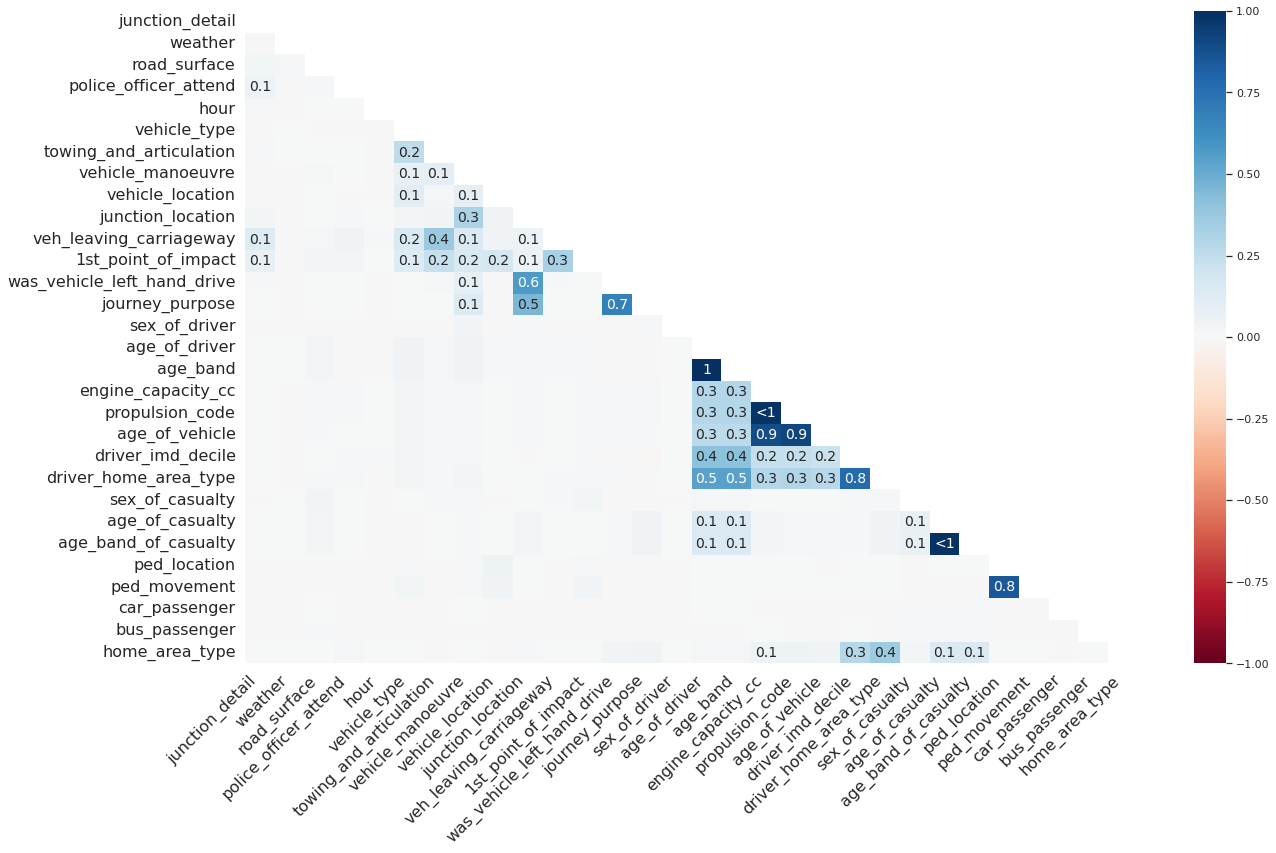

In [185]:
ms.heatmap(uk_accident_merge)

### the graph above shows that the type of missingness for some variables(especially vehicle's data) is (MAR) missing at random which means that there is a relationship /dependency between missingness and observed ones, but not the missing values. 

### Handling missing values

In [186]:
uk_accident_merge.isnull().mean()*100

accident_index                 0.00
accident_severity              0.00
number_of_vehicles             0.00
number_of_casualties           0.00
day_of_week                    0.00
local_authority_district       0.00
1st_road_class                 0.00
road_type                      0.00
speed_limit                    0.00
junction_detail                0.00
light_conditions               0.00
weather                        0.01
road_surface                   0.13
urban_rural                    0.00
police_officer_attend          0.02
hour                           0.01
month                          0.00
year                           0.00
vehicle_reference_x            0.00
vehicle_type                   0.02
towing_and_articulation        0.01
vehicle_manoeuvre              0.05
vehicle_location               0.00
junction_location              0.35
veh_leaving_carriageway        0.00
1st_point_of_impact            0.02
was_vehicle_left_hand_drive    0.77
journey_purpose             

In [187]:
uk_accident_merge.columns[uk_accident_merge.isnull().any()].tolist()

['junction_detail',
 'weather',
 'road_surface',
 'police_officer_attend',
 'hour',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_location',
 'junction_location',
 'veh_leaving_carriageway',
 '1st_point_of_impact',
 'was_vehicle_left_hand_drive',
 'journey_purpose',
 'sex_of_driver',
 'age_of_driver',
 'age_band',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'driver_imd_decile',
 'driver_home_area_type',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'ped_location',
 'ped_movement',
 'car_passenger',
 'bus_passenger',
 'home_area_type']

In [188]:
uk_accident_merge[['age_band','age_of_driver']].sample()

,age_band,age_of_driver
628607,36 - 45,44.00


In [189]:
uk_accident_merge.age_band.value_counts()

26 - 35    333143
36 - 45    294904
46 - 55    210754
21 - 25    201222
16 - 20    189012
56 - 65    128021
66 - 75     60962
Over 75     44448
11 - 15      9169
6 - 10       3229
0 - 5         296
Name: age_band, dtype: int64

In [190]:
uk_accident_merge.age_band_of_casualty.value_counts()

6.00     320432
7.00     277648
4.00     231075
5.00     209150
8.00     197796
9.00     116395
3.00      74133
10.00     63940
11.00     56826
2.00      40454
1.00      21303
Name: age_band_of_casualty, dtype: int64

In [191]:
uk_accident_merge.was_vehicle_left_hand_drive.value_counts()

1.00    1618827
2.00       9094
Name: was_vehicle_left_hand_drive, dtype: int64

In [192]:
uk_accident_merge.was_vehicle_left_hand_drive.replace({1.00:'No',2.00:'Yes'},inplace=True)
uk_accident_merge.was_vehicle_left_hand_drive.value_counts()

No     1618827
Yes       9094
Name: was_vehicle_left_hand_drive, dtype: int64

Drop columns that are out of the scope of interest for this analysis such as ('engine_capacity_cc') also those columns have more than 25% missing values, also 'age_band', 'age_band_of_casualty', cause it has missing values and already there are age's columns  need to be imputing first.

In [193]:
uk_accident_merge.drop(
    ['engine_capacity_cc', 'age_band', 'age_band_of_casualty'],axis=1,inplace=True)

In [194]:
#replace with Missing
uk_accident_merge.propulsion_code.replace(np.nan,'Missing',inplace=True)

In [195]:
uk_accident_merge.propulsion_code.value_counts()

1.0        844427
2.0        397612
Missing    393257
8.0          2855
7.0          1325
6.0           697
3.0           293
5.0            93
12.0           20
10.0            8
9.0             6
4.0             4
Name: propulsion_code, dtype: int64

In [196]:
# replace the missing value with the mode in columns with a low percentage of missingness.
cat_cols_with_low_missing=['junction_detail',
 'weather',
 'road_surface',
 'police_officer_attend','vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_location',
 'junction_location',
 'veh_leaving_carriageway',
 '1st_point_of_impact',
 'journey_purpose',
 'sex_of_driver','car_passenger','sex_of_casualty','was_vehicle_left_hand_drive',
                           'ped_location','ped_movement','bus_passenger'
                          ]
for col in cat_cols_with_low_missing:
    
    uk_accident_merge[col] = uk_accident_merge[col].fillna(uk_accident_merge[col].mode()[0])


In [197]:
uk_accident_merge[cat_cols_with_low_missing].isna().sum()

junction_detail                0
weather                        0
road_surface                   0
police_officer_attend          0
vehicle_type                   0
towing_and_articulation        0
vehicle_manoeuvre              0
vehicle_location               0
junction_location              0
veh_leaving_carriageway        0
1st_point_of_impact            0
journey_purpose                0
sex_of_driver                  0
car_passenger                  0
sex_of_casualty                0
was_vehicle_left_hand_drive    0
ped_location                   0
ped_movement                   0
bus_passenger                  0
dtype: int64

In [198]:
uk_accident_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640597 entries, 0 to 1640596
Data columns (total 46 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   accident_index               1640597 non-null  object  
 1   accident_severity            1640597 non-null  category
 2   number_of_vehicles           1640597 non-null  int8    
 3   number_of_casualties         1640597 non-null  int8    
 4   day_of_week                  1640597 non-null  category
 5   local_authority_district     1640597 non-null  category
 6   1st_road_class               1640597 non-null  category
 7   road_type                    1640597 non-null  category
 8   speed_limit                  1640597 non-null  int8    
 9   junction_detail              1640597 non-null  category
 10  light_conditions             1640597 non-null  category
 11  weather                      1640597 non-null  category
 12  road_surface                

In [199]:
uk_accident_merge.hour.fillna(uk_accident_merge.hour.median(),inplace=True)

In [200]:
uk_accident_merge.hour.isna().sum()

0

In [201]:
uk_accident_merge.rename(columns={'home_area_type':'casualty_home_area_type'},inplace=True)

In [205]:
uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640597 entries, 0 to 1640596
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   age_of_driver    1475160 non-null  float16
 1   age_of_vehicle   1191545 non-null  float16
 2   age_of_casualty  1608560 non-null  float16
dtypes: float16(3)
memory usage: 21.9 MB


In [206]:
uk_accident_merge[[
    'age_of_driver','age_of_vehicle','age_of_casualty']].describe()

,age_of_driver,age_of_vehicle,age_of_casualty
count,"1,475,160.00","1,191,545.00","1,608,560.00"
mean,NaN,NaN,NaN
std,0.00,0.00,0.00
min,1.00,1.00,1.00
25%,25.00,4.00,21.00
50%,36.00,7.00,32.00
75%,49.00,10.00,47.00
max,100.00,110.00,103.00
